# Prosper Loan Data Exploration

## Investigation Overview

In this investigation, I wanted to look at the characteristics of variables that could be used to predict the client behaviour based on the income range. The main focus was on this parameters :Credit Grade, LoanStatus, Estimated return, Estimated Effective Yield , Estimated Loss Rate P_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss and LP_NonPrincipalRecoverypayments) and the key attributes are ListingKey, ListingNumber and ListingCreationDateCs of diamonds: carat (weight), cut grade, color grade, and clarity grade.

## Dataset Overview

The dataset consisted of 61 attributes of 113,937 loans. The parameters mentioned are only will be assessed.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan= pd.read_csv('prosperLoanData.csv')

In [3]:
# convert CreditGrade and LoanStatus into ordered categorical types
ordinal_var_dict = {'CreditGrade': ['C','HR','AA','D','B','E','A','NC'],
                    'LoanStatus': ['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted', 'Chargedoff', 'Past Due (16-30 days)', 'Cancelled','Past Due (61-90 days)','Past Due (31-60 days)','Past Due (91-120 days)','FinalPaymentInProgress','Past Due (>120 days)'],}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan[var] = loan[var].astype(ordered_var)

In [4]:
# data wrangling,creat lo_df containes the variables we want to investigate
lo_df= loan[['ListingNumber','CreditGrade','LoanStatus','EstimatedEffectiveYield','EstimatedLoss',
            'IncomeRange','EstimatedReturn','LoanOriginalAmount','LP_CustomerPayments', 
             'LP_CustomerPrincipalPayments','LP_InterestandFees','LP_ServiceFees','LP_CollectionFees',
             'LP_GrossPrincipalLoss','LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments' ]]

In [5]:
# replace all nan in CreditGrade by NA (not applicaple)
lo_df['CreditGrade'].fillna('NC', inplace=True)


In [6]:
# replace all nan in EstimatedLoss by the mean
[lo_df['EstimatedEffectiveYield'].fillna(lo_df['EstimatedEffectiveYield'].mean(), inplace=True) for col in lo_df.columns]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [7]:
# replace all nan in EstimatedLoss by the mean
[lo_df['EstimatedLoss'].fillna(lo_df['EstimatedLoss'].mean(), inplace=True) for col in lo_df.columns]
print(lo_df['EstimatedLoss'].isna().sum())

0


In [8]:
# replace nan value in EstimatedReturn by the substraction between EstimatedLoss and EstimatedEffectiveYield as per the data description
lo_df['EstimatedReturn'] = lo_df['EstimatedEffectiveYield'].sub(lo_df['EstimatedLoss'])


In [9]:
print(lo_df['EstimatedReturn'].isna().sum())

0


In [10]:
#include all nan value to gatecory $0
lo_df['IncomeRange'].fillna('$0', inplace=True)

In [11]:
# convert IncomeRange into ordered categorical types
ordinal_var_dict2 = {'IncomeRange': ['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
                                    '$75,000-99,999', '$1-24,999', 'Not employed', '$0']}

for var in ordinal_var_dict2 :
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict2[var])
    lo_df[var] = lo_df[var].astype(ordered_var)

## Distribution of Income Range

Income Range in the dataset take on a range of values, from about 0 USD at the lowest, to about \$100,000+ at the highest. By plotting it, the distribution of Income Range is normal distribution.

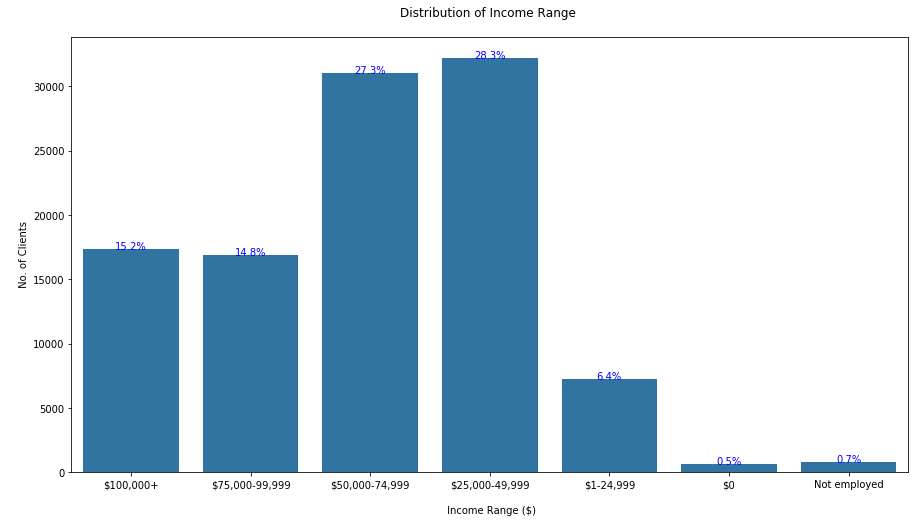

In [12]:
# let's  exclude 'Not displayed' and plot it to get an idea of each ordinal category distribution.
fig, ax = plt.subplots( figsize = [15,8])

level_order = ['$100,000+','$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999','$0','Not employed']
ordered_range = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
lo_df['IncomeRange'] = lo_df['IncomeRange'].astype(ordered_range)

default_color = sb.color_palette()[0]
sb.countplot(data = lo_df, x = 'IncomeRange', color = default_color)

# add annotations
n_points = lo_df.shape[0]
range_counts = lo_df['IncomeRange'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = range_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'b')
plt.title('Distribution of Income Range \n')
plt.xlabel('\n Income Range ($)')
plt.ylabel('\n No. of Clients')

plt.show();

## Distribution of Estimate dReturn

The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. it is found that the estimated return for almost 40000 client is around 0.08-0.09.

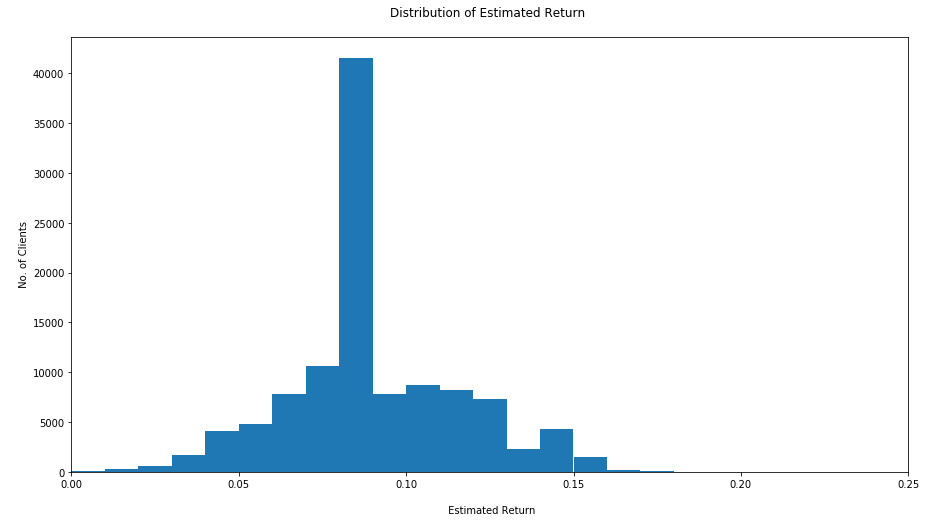

In [13]:
# plotting EstimatedReturn on a standard scale
binsize = 0.01
bins = np.arange(0, lo_df['EstimatedReturn'].max()+binsize, binsize)

plt.figure(figsize=[15, 8])
plt.hist(data = lo_df, x = 'EstimatedReturn', bins = bins)
plt.xlim([0,0.25])
plt.xlabel('\n Estimated Return')
plt.ylabel('\n No. of Clients')

plt.title('Distribution of Estimated Return \n')
plt.show();

## Distribution of 8 LP's

The distribution of LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_NonPrincipalRecoverypayments and LP_InterestandFees are left skwed while LP_ServiceFees and LP_CollectionFees are right skwed. LP_GrossPrincipalLoss
and LP_NetPrincipalLoss are non uniform distribution.


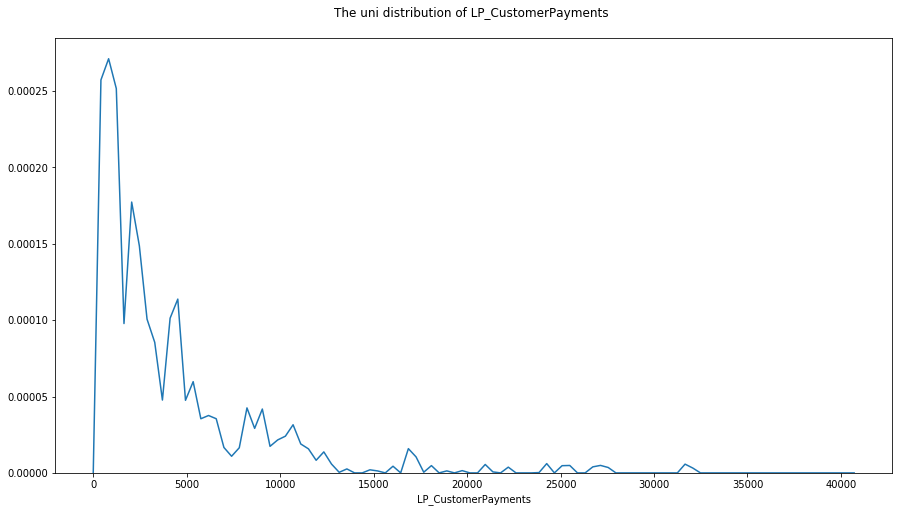

In [14]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
fig = plt.subplots(figsize = [15,8])

default_color = sb.color_palette()[0]

sb.distplot(a=lo_df['LP_CustomerPayments'], color = default_color,hist = False, rug = True, rug_kws = {'color' : 'w'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})
plt.title('The uni distribution of LP_CustomerPayments \n')

plt.show();

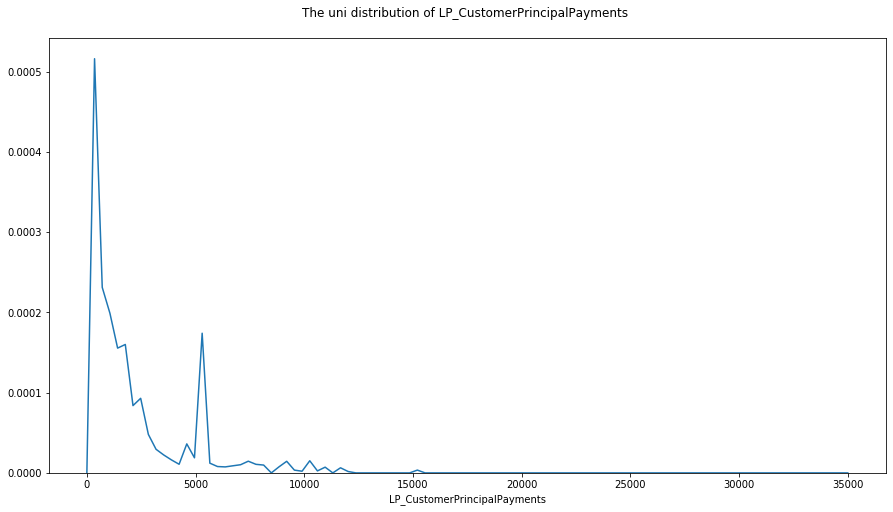

In [15]:
fig = plt.subplots(figsize = [15,8])
default_color = sb.color_palette()[0]
sb.distplot(lo_df['LP_CustomerPrincipalPayments'], color = default_color,hist = False, rug = True, rug_kws = {'color' : 'w'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})
plt.title('The uni distribution of LP_CustomerPrincipalPayments \n')
plt.show();

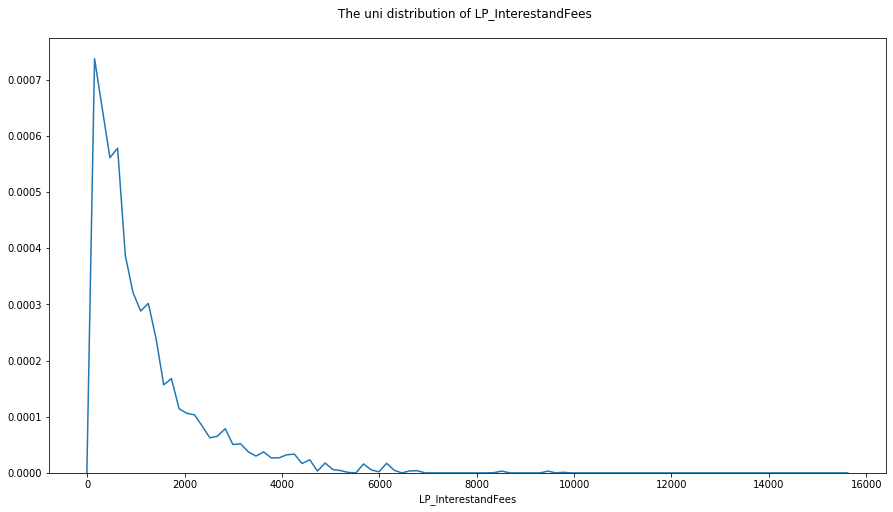

In [16]:
fig= plt.subplots(figsize = [15,8])
default_color = sb.color_palette()[0]
sb.distplot(lo_df['LP_InterestandFees'], color = default_color,hist = False, rug = True, rug_kws = {'color' : 'w'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})
plt.title('The uni distribution of LP_InterestandFees \n')
plt.show();

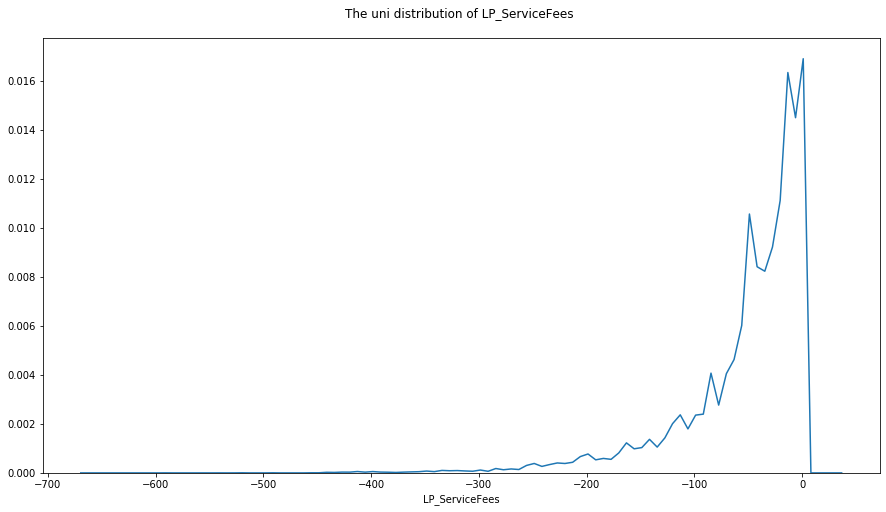

In [17]:
fig = plt.subplots(figsize = [15,8])
default_color = sb.color_palette()[0]
sb.distplot(lo_df['LP_ServiceFees'], color = default_color,hist = False, rug = True, rug_kws = {'color' : 'w'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})
plt.title('The uni distribution of LP_ServiceFees \n')
plt.show();

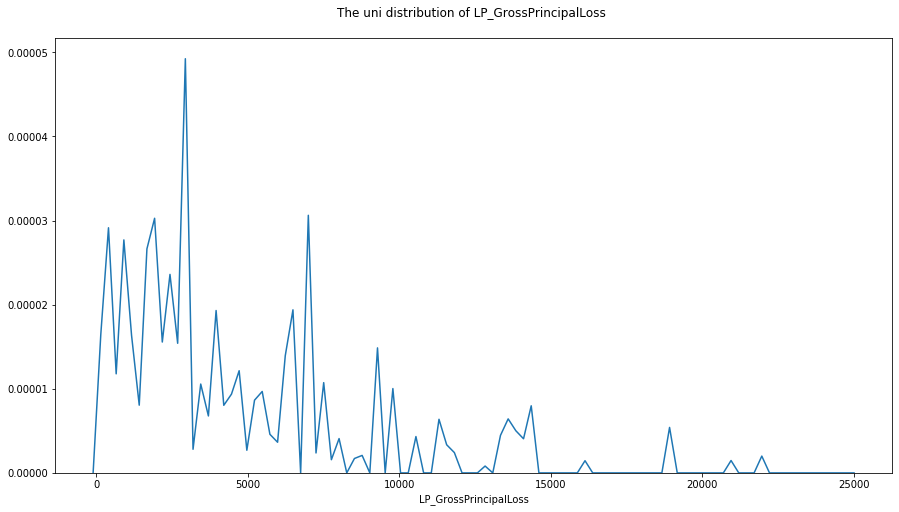

In [18]:
fig = plt.subplots(figsize = [15,8])
default_color = sb.color_palette()[0]
sb.distplot( lo_df ['LP_GrossPrincipalLoss'], color = default_color,hist = False, rug = True, rug_kws = {'color' : 'w'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})
plt.title('The uni distribution of LP_GrossPrincipalLoss \n')
plt.show();

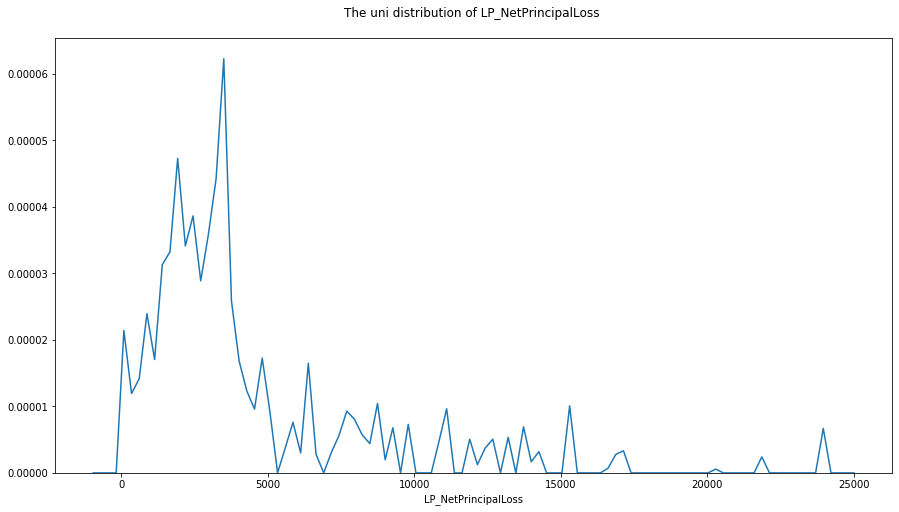

In [19]:
fig = plt.subplots(figsize = [15,8])
default_color = sb.color_palette()[0]
sb.distplot(lo_df ['LP_NetPrincipalLoss'], color = default_color,hist = False, rug = True, rug_kws = {'color' : 'w'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})
plt.title('The uni distribution of LP_NetPrincipalLoss \n')
plt.show();

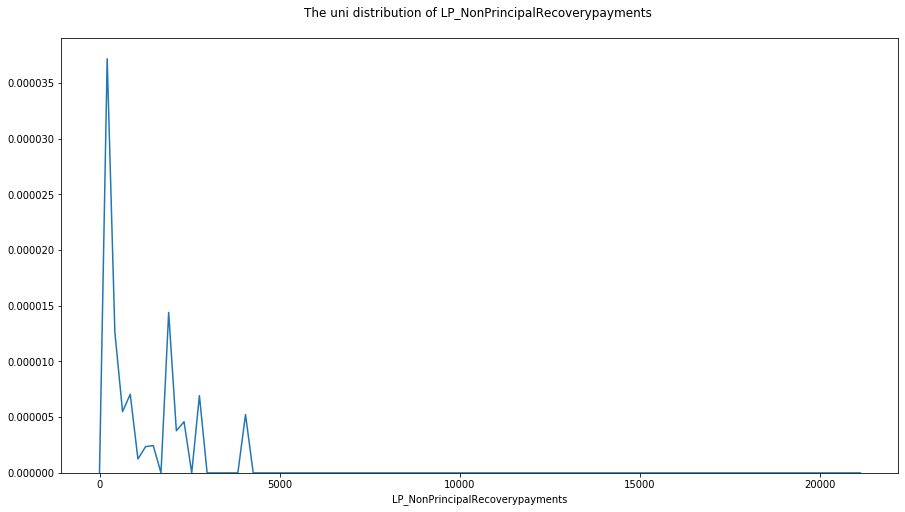

In [20]:

fig = plt.subplots(figsize = [15,8])
default_color = sb.color_palette()[0]
sb.distplot(lo_df['LP_NonPrincipalRecoverypayments'], color = default_color,hist = False, rug = True, rug_kws = {'color' : 'w'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})
plt.title('The uni distribution of LP_NonPrincipalRecoverypayments \n')
plt.show();

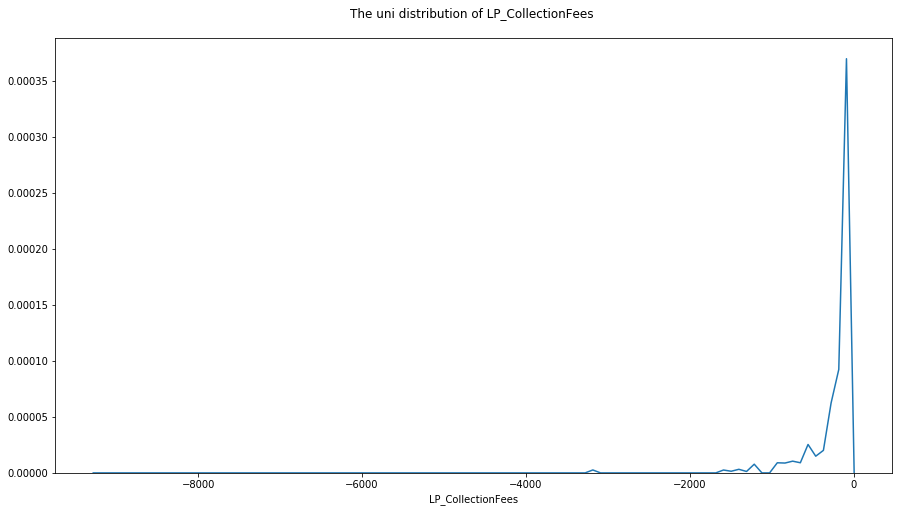

In [21]:
fig = plt.subplots(figsize = [15,8])
default_color = sb.color_palette()[0]
sb.distplot( lo_df['LP_CollectionFees'], color = default_color,hist = False, rug = True, rug_kws = {'color' : 'w'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})
plt.title('The uni distribution of LP_CollectionFees \n')
plt.show();

## The relationships between the three categorical features.
It seems that the client with credit grade 'NC' has the most completed statues, while the client with income range from 50k to 74k USD have the most completed statues. As expected the most clintes with in come range from 50k to 74k USD are classified as NC in credit grade.

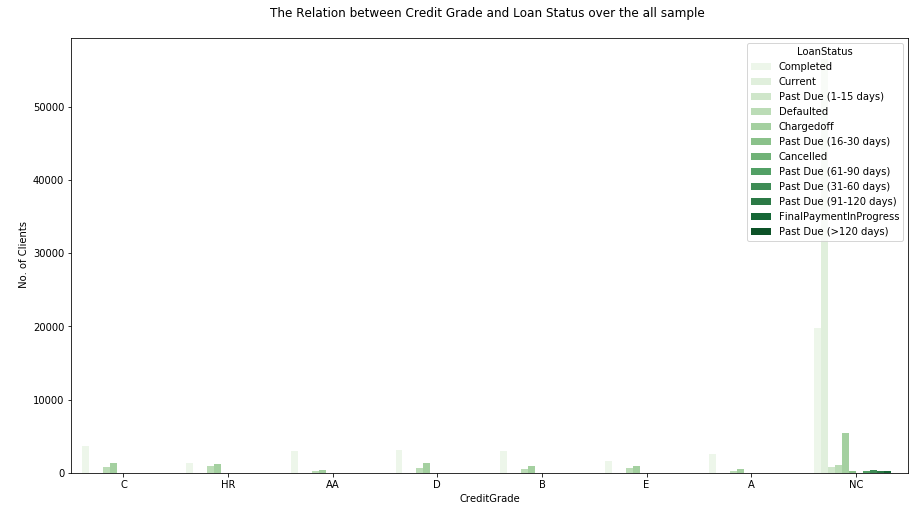

In [34]:
plt.figure(figsize = [15, 8])
# subplot 1: CreditGrade vs LoanStatus by using the full data
sb.countplot(data = lo_df, x = 'CreditGrade', hue = 'LoanStatus', palette = 'Greens')
plt.title('The Relation between Credit Grade and Loan Status over the all sample \n')
plt.ylabel('\n No. of Clients')
plt.show();

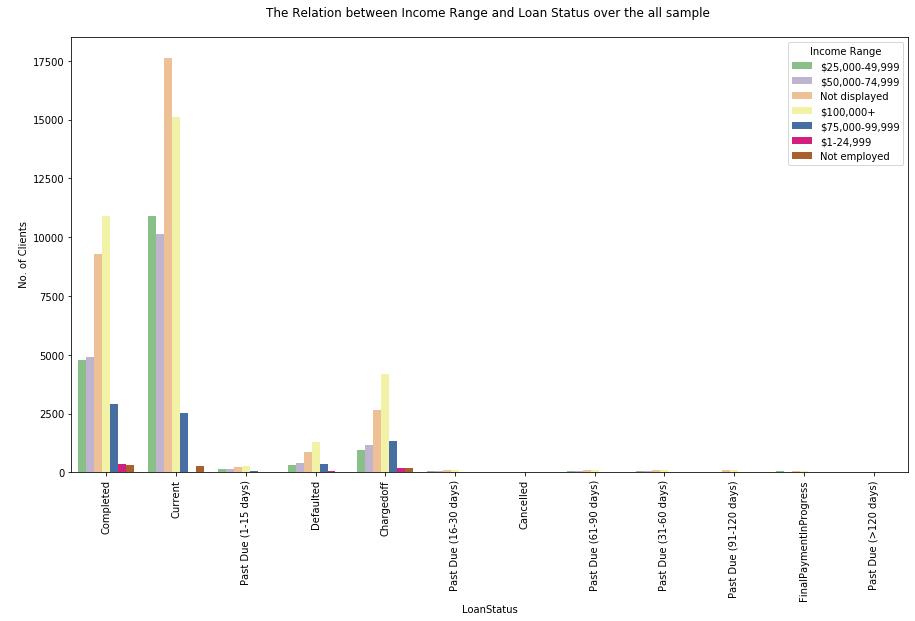

In [37]:
# subplot 2: IncomeRange vs. LoanStatus by using the full data by different color
plt.figure(figsize = [15, 8])
ax=sb.countplot(data = lo_df, x = 'LoanStatus', hue = 'IncomeRange', palette = 'Accent')
ax.legend(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
                                    '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], loc=1, title='Income Range')
plt.xticks(rotation=90)
plt.title('The Relation between Income Range and Loan Status over the all sample \n');
plt.ylabel('\n No. of Clients');
plt.show();

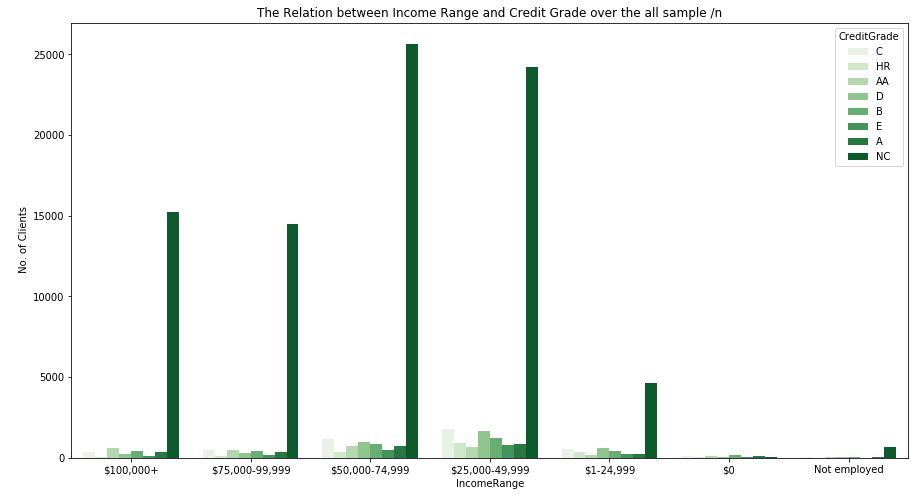

In [36]:
# subplot 3: IncomeRange vs. CreditGrade by using the full data
plt.figure(figsize = [15, 8])
sb.countplot(data = lo_df, x = 'IncomeRange', hue = 'CreditGrade', palette = 'Greens')
plt.title('The Relation between Income Range and Credit Grade over the all sample /n')
plt.ylabel('\n No. of Clients')
plt.show();

## Estimated Loss and Estimated Return by Income Range

There is an interaction effect visible between Estimated Loss , Estimated Return, and the categorical measures of income: Income Range. This is most evident for the return measure.It is clear that the not employed have the highst Estimated Loss and lowest Estimated Return. But what woundring is there is a portion of the people those have income more than 100K are in the zone of the highst Estimated Loss and lowest Estimated Return.

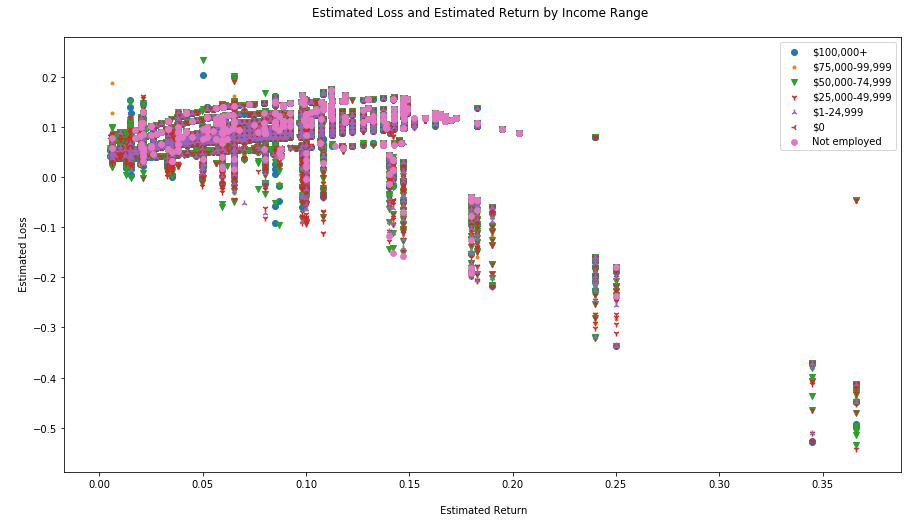

In [38]:
# plot the Income Range with EstimatedLoss and EstimatedReturn
plt.figure(figsize = [15, 8])

Grades = [['$100,000+', 'o'],['$75,000-99,999','.'],['$50,000-74,999','v'],['$25,000-49,999','1'],
          ['$1-24,999','2'],['$0','3'],['Not employed','8']]

for i, marker in Grades:
    df_cat = lo_df[lo_df['IncomeRange'] == i]
    plt.scatter(data = df_cat, x = 'EstimatedLoss', y = 'EstimatedReturn', marker = marker)
plt.legend(['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not employed'])
plt.ylabel('\n Estimated Loss')
plt.xlabel('\n Estimated Return')
plt.title('Estimated Loss and Estimated Return by Income Range \n');


## Estimated EffectiveYield and Estimated Loss by Income Range

We can see how Income Range affected the Estimated EffectiveYield and Estimated Loss.most of the sample have yield in the range between 0 and 0.2. but the still the not employed people tend to have high loss estimated up to 0.3, while most of the sample have loss estimated to be below 0.2 . 

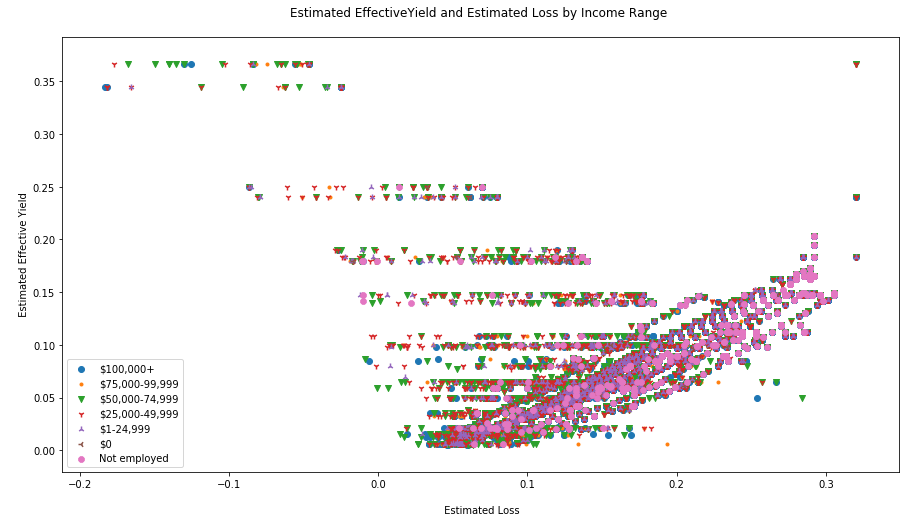

In [39]:
# plot the Income Range with EstimatedEffectiveYield and EstimatedLoss
plt.figure(figsize = [15, 8])

Grades = [['$100,000+', 'o'],['$75,000-99,999','.'],['$50,000-74,999','v'],['$25,000-49,999','1'],
          ['$1-24,999','2'],['$0','3'],['Not employed','8']]

for i, marker in Grades:
    df_cat = lo_df[lo_df['IncomeRange'] == i]
    plt.scatter(data = df_cat, x = 'EstimatedEffectiveYield', y = 'EstimatedLoss', marker = marker)
plt.legend(['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not employed'])
plt.ylabel('\n Estimated Effective Yield')
plt.xlabel('\n Estimated Loss')
plt.title('Estimated EffectiveYield and Estimated Loss by Income Range \n');


## Estimated EffectiveYield and Estimated Return by Income Range

We can see how Income Range affected the Estimated EffectiveYield and Estimated return.most of the sample have return estimated in the range between .05 and 0.3. Except some client have income range between 50K and 74K, have estimated return below than zero.

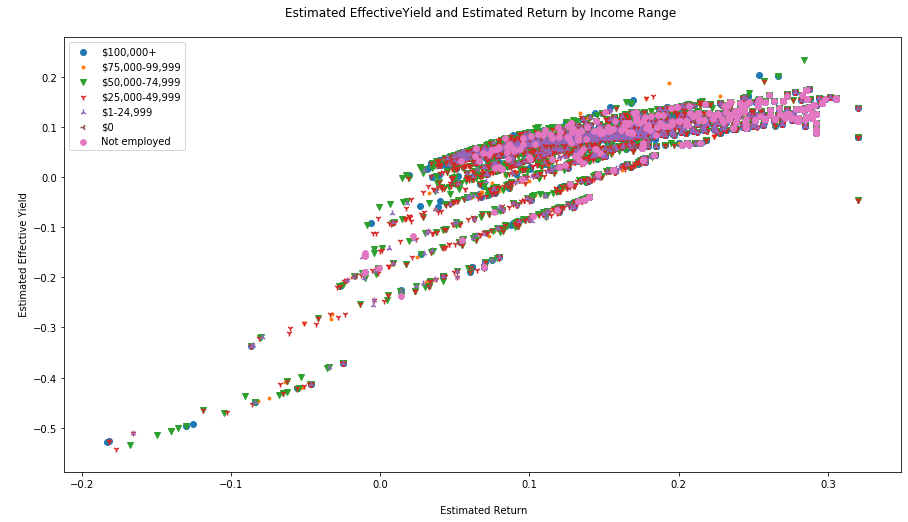

In [40]:
# plot the Income Range with EstimatedEffectiveYield and EstimatedReturn
plt.figure(figsize = [15, 8])

Grades = [['$100,000+', 'o'],['$75,000-99,999','.'],['$50,000-74,999','v'],['$25,000-49,999','1'],
          ['$1-24,999','2'],['$0','3'],['Not employed','8']]

for i, marker in Grades:
    df_cat = lo_df[lo_df['IncomeRange'] == i]
    plt.scatter(data = df_cat, x = 'EstimatedEffectiveYield', y = 'EstimatedReturn', marker = marker)
plt.legend(['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not employed'])
plt.ylabel('\n Estimated Effective Yield')
plt.xlabel('\n Estimated Return')
plt.title('Estimated EffectiveYield and Estimated Return by Income Range \n');


## LP_Customer Payments and LP_Customer Principal Payments by Income Range

Reproducing the same plots but with the mentioned parameters by the income range shows that the majority of the clients have a payment , whatever the priciple of the normal, up to 10K

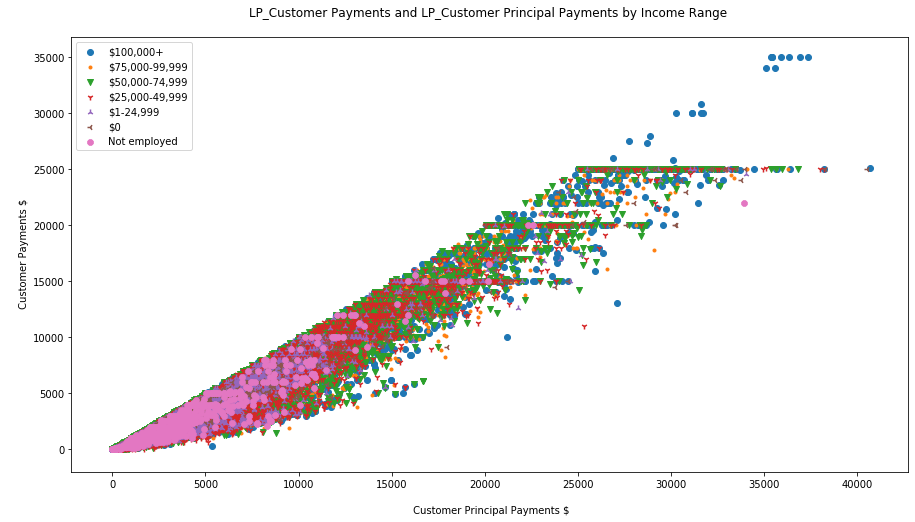

In [28]:
# plot the Income Rangewith LP_CustomerPayments and LP_CustomerPrincipalPayments
plt.figure(figsize = [15, 8])

Grades = [['$100,000+', 'o'],['$75,000-99,999','.'],['$50,000-74,999','v'],['$25,000-49,999','1'],
          ['$1-24,999','2'],['$0','3'],['Not employed','8']]

for i, marker in Grades:
    df_cat = lo_df[lo_df['IncomeRange'] == i]
    plt.scatter(data = df_cat, x = 'LP_CustomerPayments', y = 'LP_CustomerPrincipalPayments', marker = marker)
plt.legend(['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not employed'])
plt.ylabel('\n Customer Payments $')
plt.xlabel('\n Customer Principal Payments $')
plt.title('LP_Customer Payments and LP_Customer Principal Payments by Income Range \n')

plt.show();

## LP_Customer Payments and LP_Service Fees Payments by Income Range
Reproducing the same plots but with the mentioned parameters by the income range shows that when the fees increase the payment delayed, espicially with the client have high income range.

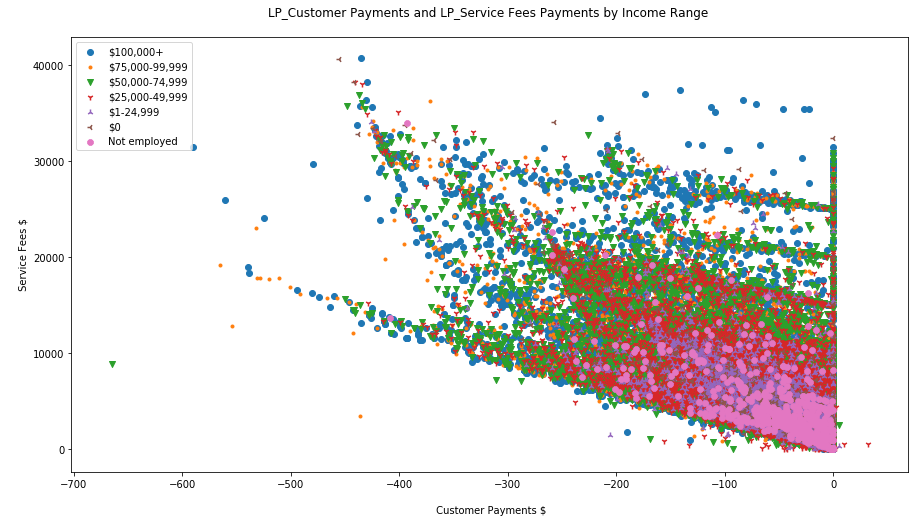

In [41]:
# plot the Income Range with LP_ServiceFees and LP_CustomerPayments 
plt.figure(figsize = [15, 8])

Grades = [['$100,000+', 'o'],['$75,000-99,999','.'],['$50,000-74,999','v'],['$25,000-49,999','1'],
          ['$1-24,999','2'],['$0','3'],['Not employed','8']]

for i, marker in Grades:
    df_cat = lo_df[lo_df['IncomeRange'] == i]
    plt.scatter(data = df_cat, x = 'LP_ServiceFees', y = 'LP_CustomerPayments', marker = marker)
plt.legend(['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not employed'])
plt.ylabel('\n Service Fees $')
plt.xlabel('\n Customer Payments $')
plt.title('LP_Customer Payments and LP_Service Fees Payments by Income Range \n')
plt.show();

## LP_P_Interestand Fees and LP_Service Fees Payments by Income Range
Reproducing the same plots but with the mentioned parameters by the income range shows that 

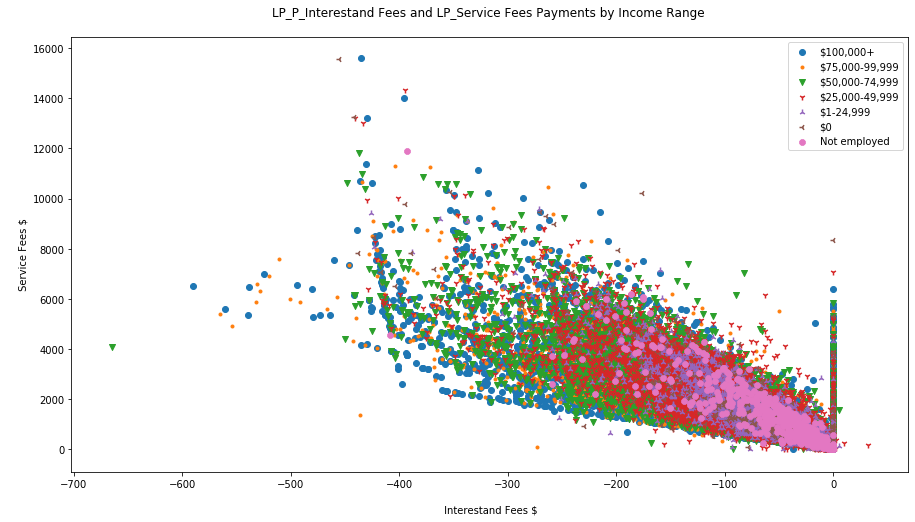

In [42]:
# plot the credit grade with LP_ServiceFees and LP_InterestandFees
plt.figure(figsize = [15, 8])

Grades = [['$100,000+', 'o'],['$75,000-99,999','.'],['$50,000-74,999','v'],['$25,000-49,999','1'],
          ['$1-24,999','2'],['$0','3'],['Not employed','8']]

for i, marker in Grades:
    df_cat = lo_df[lo_df['IncomeRange'] == i]
    plt.scatter(data = df_cat, x = 'LP_ServiceFees', y = 'LP_InterestandFees', marker = marker)
plt.legend(['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not employed'])
plt.ylabel('\n Service Fees $')
plt.xlabel('\n Interestand Fees $')
plt.title('LP_P_Interestand Fees and LP_Service Fees Payments by Income Range \n')
plt.show();

## LP_Gross Principal Loss and LP_Loan Original Amount  by Income Range
Reproducing the same plots but with the mentioned parameters by the income range shows that Gross Principal Loss is high at the low Loan Original Amount. and the Gross Principal Loss is higher in the client have income range more than 100k

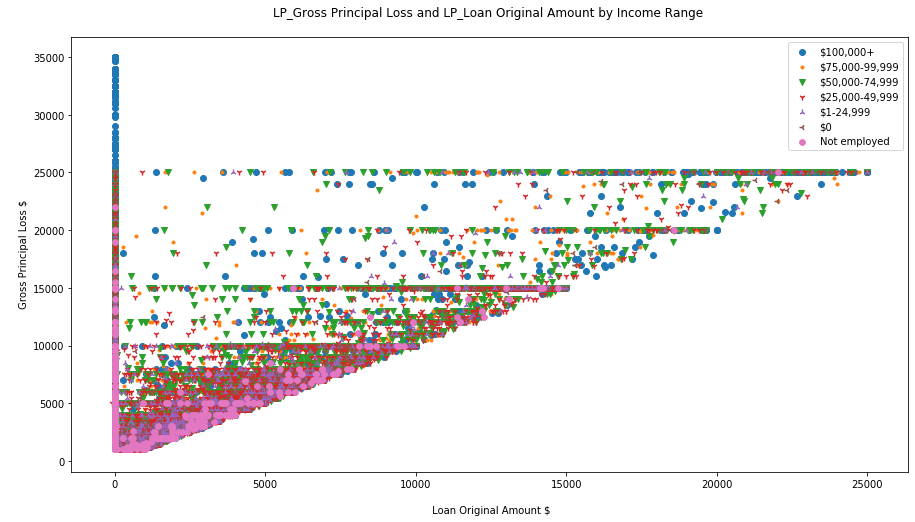

In [43]:
# plot the Income Range with LP_GrossPrincipalLoss and LoanOriginalAmount 
plt.figure(figsize = [15, 8])

Grades = [['$100,000+', 'o'],['$75,000-99,999','.'],['$50,000-74,999','v'],['$25,000-49,999','1'],
          ['$1-24,999','2'],['$0','3'],['Not employed','8']]

for i, marker in Grades:
    df_cat = lo_df[lo_df['IncomeRange'] == i]
    plt.scatter(data = df_cat, x = 'LP_GrossPrincipalLoss', y = 'LoanOriginalAmount', marker = marker)
plt.legend(['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not employed'])
plt.ylabel('\n Gross Principal Loss $')
plt.xlabel('\n Loan Original Amount $')
plt.title('LP_Gross Principal Loss and LP_Loan Original Amount by Income Range \n')
plt.show();

## LP_Gross Principal Loss and LP_Net Principal Loss  by Income Range
Reproducing the same plots but with the mentioned parameters by the income range shows that the relation between the two parameters are directly proportional except for som clients with income range more than 100k are lower than the datum line of the relation between Gross Principal Loss and Net Principal Loss

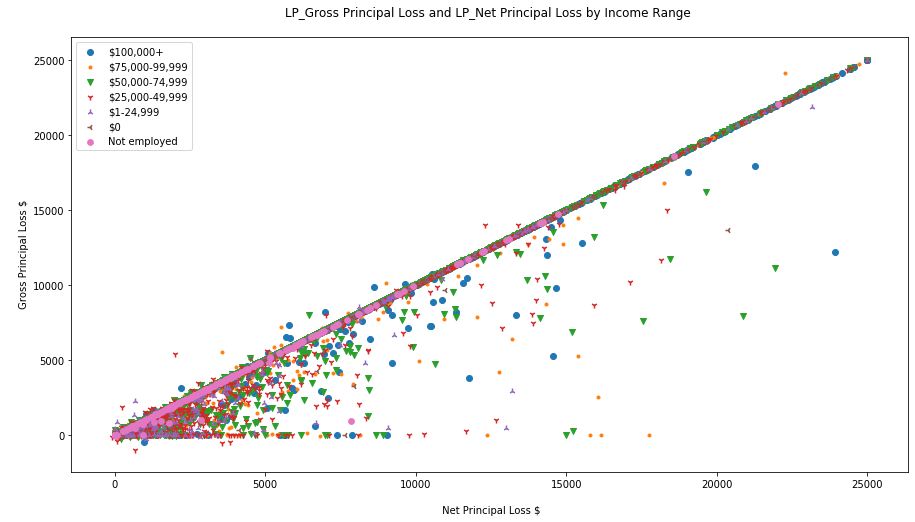

In [44]:
# plot the Income Range with LP_GrossPrincipalLoss and LP_NetPrincipalLoss
plt.figure(figsize = [15, 8])

Grades = [['$100,000+', 'o'],['$75,000-99,999','.'],['$50,000-74,999','v'],['$25,000-49,999','1'],
          ['$1-24,999','2'],['$0','3'],['Not employed','8']]

for i, marker in Grades:
    df_cat = lo_df[lo_df['IncomeRange'] == i]
    plt.scatter(data = df_cat, x = 'LP_GrossPrincipalLoss', y = 'LP_NetPrincipalLoss', marker = marker)
plt.legend(['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not employed'])
plt.ylabel('\n Gross Principal Loss $')
plt.xlabel('\n Net Principal Loss $')
plt.title('LP_Gross Principal Loss and LP_Net Principal Loss by Income Range \n')
plt.show();

## Loan Original Amount and LP_Net Principal Loss  by Income Range
Reproducing the same plots but with the mentioned parameters by the income range shows that the net Principal Loss is high at the low Loan Original Amount. and the Gross Principal Loss is higher in the client have income range more than 100k

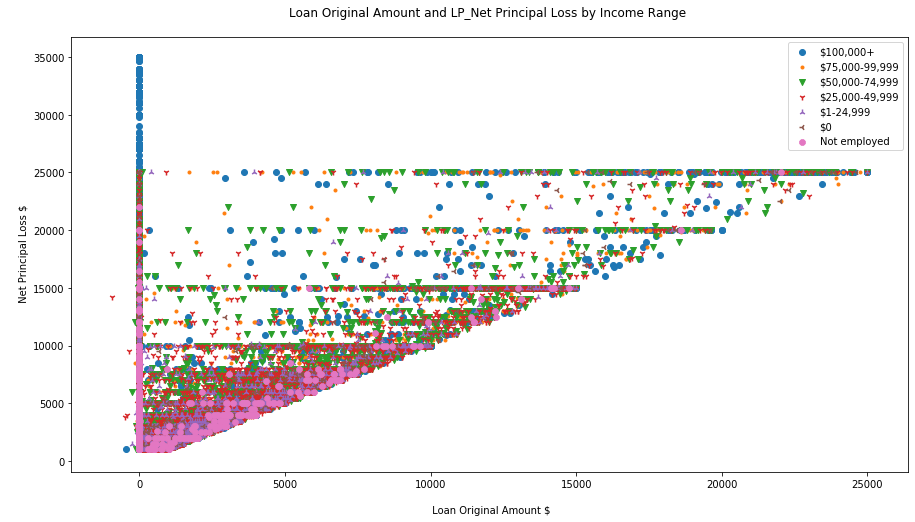

In [45]:
# plot the Income Range with LP_NetPrincipalLoss and LoanOriginalAmount
plt.figure(figsize = [15, 8])

Grades = [['$100,000+', 'o'],['$75,000-99,999','.'],['$50,000-74,999','v'],['$25,000-49,999','1'],
          ['$1-24,999','2'],['$0','3'],['Not employed','8']]

for i, marker in Grades:
    df_cat = lo_df[lo_df['IncomeRange'] == i]
    plt.scatter(data = df_cat, x = 'LP_NetPrincipalLoss', y = 'LoanOriginalAmount', marker = marker)
plt.legend(['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not employed'])
plt.ylabel('\n Net Principal Loss $')
plt.xlabel('\n Loan Original Amount $')
plt.title('Loan Original Amount and LP_Net Principal Loss by Income Range \n')
plt.show();